In [43]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras import models
from keras import layers

In [44]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

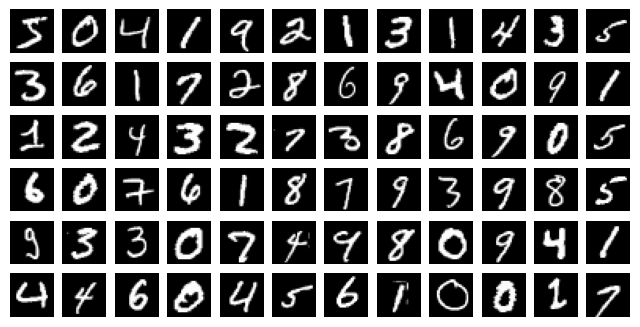

In [45]:
fig, ax = plt.subplots(nrows=6, ncols=12, figsize=(8,4))
for i, ax in enumerate(ax.flat):
    ax.imshow(train_images[i], cmap='gray')
    ax.axis('off')

In [46]:
train_images.shape

(60000, 28, 28)

In [47]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [48]:
test_images.shape

(10000, 28, 28)

In [49]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [50]:
network = models.Sequential()

In [51]:
network.add(layers.Input(shape=(784,)))
network.add(layers.Dense(512, activation='relu'))
network.add(layers.Dense(10, activation='softmax'))

In [52]:
network.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

In [53]:
train_images = train_images.reshape((60000,28*28))
train_images = train_images.astype('float32')/255

test_images = test_images.reshape((10000,28*28))
test_images = test_images.astype('float32')/255

In [55]:
from keras.utils import to_categorical

In [56]:
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [57]:
network.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.8711 - loss: 0.4450 
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9655 - loss: 0.1184
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9782 - loss: 0.0739
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9844 - loss: 0.0511 
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9890 - loss: 0.0366


In [59]:
test_loss, test_acc = network.evaluate(test_images, test_labels)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9765 - loss: 0.0782    


In [60]:
print(f'test_acc: {test_acc}')

test_acc: 0.980400025844574
